In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#number of steps
N_x, N_y = 200, 200

#total range -- starts at (0, 0)
x_max, y_max = 10, 10

#size of each step
dx = x_max / N_x
dy = y_max / N_y

In [3]:
def get_phi(x, y):    
    r = [4.5001, 4.5001]

    #charge on wire
    q = 2
    
    #calculate phi
    phi = q * np.log((x - r[0])**2 + (y - r[1])**2) / 2
    return phi

In [4]:
#define an array and axes
phi_start = np.zeros((N_y + 1, N_x + 1))
X = np.zeros(N_x + 1)
Y = np.zeros(N_y + 1)
Y[0] = 0
Y[N_y] = y_max

for x in range(0, N_x + 1):
    #set values for the X axis
    X[x] = x * dx
    #compute the potentials at edges
    phi_start[0, x] = get_phi(x * dx, 0)
    if x * dx < 6:
        phi_start[N_y, x] = get_phi(x * dx, y_max)
    else:
        phi_start[(int)(6 / dy), x] = get_phi(x * dx, 6)
for y in range(1, N_y):
    #set values for the Y axis
    Y[y] = y * dy
    #compute the potentials at edges
    phi_start[y, 0] = get_phi(0, y * dy)
    if y * dy < 6:
        phi_start[y, N_x] = get_phi(x_max, y * dy)
    else:
        phi_start[y, (int)(6 / dx)] = get_phi(6, y * dy)

In [5]:
#max iterations
N_max = 1500

#minimum error
epsilon = 4.334284592200674e-27

#number of iterations
N = 0

#current error (set to high number)
delta = 100

#relaxation factor
alpha = 1.9

#stores current phi array
phi = np.copy(phi_start)

#stores what next phi array will be (used if alpha != 1)
phi_new = np.zeros((N_y + 1, N_x + 1))

#while error is too high or haven't done enough iterations
while (delta > epsilon) and (N < N_max):
    #set current error to zero
    delta = 0
    
    #create new phi
    phi_old = np.copy(phi)
    
    #for each item in the range
    for x in range (1, N_x):
        for y in range (1, N_y):
            #special boundary
            if x * dx < 6 or y * dy < 6:
                #approximate new value of phi given surroundings
                phi_new[y, x] = 0.25 * (phi[y, x + 1] + phi[y, x - 1] + phi[y + 1, x] + phi[y - 1, x])

                #use relaxation factor if necessary
                phi[y, x] += alpha * (phi_new[y, x] - phi[y, x])

                #calculate error
                delta += (phi[y, x] - phi_old[y, x])**2

    #increment N
    N += 1
    print(N, "out of", N_max, "iterations complete.");
    print("Error is:", delta);

#calculate Phi = Phi_0 - Phi_R
phi_total = np.zeros((N_y + 1, N_x + 1))
for x in range(0, N_x + 1):
    for y in range(0, N_y + 1):
        if (x * dx < 6 or y * dy < 6):
            phi_total[y, x] = phi[y, x] - get_phi(x * dx, y * dy)
        
#print necessary values
print("N =", N, "delta =", delta)

1 out of 1500 iterations complete.
Error is: 23203.4983241067
2 out of 1500 iterations complete.
Error is: 2980.719594087887
3 out of 1500 iterations complete.
Error is: 2419.026811870223
4 out of 1500 iterations complete.
Error is: 1968.7670536133032
5 out of 1500 iterations complete.
Error is: 1606.2276868477772
6 out of 1500 iterations complete.
Error is: 1313.5939696787314
7 out of 1500 iterations complete.
Error is: 1076.9213234918745
8 out of 1500 iterations complete.
Error is: 885.1858270758411
9 out of 1500 iterations complete.
Error is: 729.6133199301996
10 out of 1500 iterations complete.
Error is: 603.1836786433436
11 out of 1500 iterations complete.
Error is: 500.2661700865605
12 out of 1500 iterations complete.
Error is: 416.33960350804074
13 out of 1500 iterations complete.
Error is: 347.77080626112786
14 out of 1500 iterations complete.
Error is: 291.63658314728076
15 out of 1500 iterations complete.
Error is: 245.582209756067
16 out of 1500 iterations complete.
Error is

129 out of 1500 iterations complete.
Error is: 1.5965085620339277
130 out of 1500 iterations complete.
Error is: 1.5729395115506495
131 out of 1500 iterations complete.
Error is: 1.5498042507239593
132 out of 1500 iterations complete.
Error is: 1.5270910263892388
133 out of 1500 iterations complete.
Error is: 1.504788552934979
134 out of 1500 iterations complete.
Error is: 1.482885987185458
135 out of 1500 iterations complete.
Error is: 1.4613729088619851
136 out of 1500 iterations complete.
Error is: 1.4402393010895993
137 out of 1500 iterations complete.
Error is: 1.4194755301437394
138 out of 1500 iterations complete.
Error is: 1.3990723285434357
139 out of 1500 iterations complete.
Error is: 1.3790207772152765
140 out of 1500 iterations complete.
Error is: 1.3593122891869314
141 out of 1500 iterations complete.
Error is: 1.3399385940569535
142 out of 1500 iterations complete.
Error is: 1.3208917230171593
143 out of 1500 iterations complete.
Error is: 1.3021639949880204
144 out of 1

256 out of 1500 iterations complete.
Error is: 0.2859943073707384
257 out of 1500 iterations complete.
Error is: 0.2822461031820163
258 out of 1500 iterations complete.
Error is: 0.27854635274327666
259 out of 1500 iterations complete.
Error is: 0.27489441505841467
260 out of 1500 iterations complete.
Error is: 0.2712896586274576
261 out of 1500 iterations complete.
Error is: 0.26773146140307147
262 out of 1500 iterations complete.
Error is: 0.2642192105049957
263 out of 1500 iterations complete.
Error is: 0.26075230214151845
264 out of 1500 iterations complete.
Error is: 0.2573301413663129
265 out of 1500 iterations complete.
Error is: 0.25395214197914573
266 out of 1500 iterations complete.
Error is: 0.25061772631328355
267 out of 1500 iterations complete.
Error is: 0.24732632512405706
268 out of 1500 iterations complete.
Error is: 0.24407737739920796
269 out of 1500 iterations complete.
Error is: 0.24087033024120597
270 out of 1500 iterations complete.
Error is: 0.23770463869492256


380 out of 1500 iterations complete.
Error is: 0.054096471265907185
381 out of 1500 iterations complete.
Error is: 0.05336187574032525
382 out of 1500 iterations complete.
Error is: 0.05263708976604605
383 out of 1500 iterations complete.
Error is: 0.05192198591020121
384 out of 1500 iterations complete.
Error is: 0.05121643832653493
385 out of 1500 iterations complete.
Error is: 0.05052032273673111
386 out of 1500 iterations complete.
Error is: 0.049833516411820475
387 out of 1500 iterations complete.
Error is: 0.049155898153967884
388 out of 1500 iterations complete.
Error is: 0.04848734827823326
389 out of 1500 iterations complete.
Error is: 0.047827748594892486
390 out of 1500 iterations complete.
Error is: 0.04717698239159015
391 out of 1500 iterations complete.
Error is: 0.04653493441598293
392 out of 1500 iterations complete.
Error is: 0.045901490858410984
393 out of 1500 iterations complete.
Error is: 0.04527653933486996
394 out of 1500 iterations complete.
Error is: 0.04465996

502 out of 1500 iterations complete.
Error is: 0.010032896176538634
503 out of 1500 iterations complete.
Error is: 0.0098943398955735
504 out of 1500 iterations complete.
Error is: 0.009757687542467402
505 out of 1500 iterations complete.
Error is: 0.009622913186901602
506 out of 1500 iterations complete.
Error is: 0.009489991246159181
507 out of 1500 iterations complete.
Error is: 0.009358896480588425
508 out of 1500 iterations complete.
Error is: 0.009229603989132045
509 out of 1500 iterations complete.
Error is: 0.009102089204910777
510 out of 1500 iterations complete.
Error is: 0.008976327890857068
511 out of 1500 iterations complete.
Error is: 0.008852296135419166
512 out of 1500 iterations complete.
Error is: 0.00872997034829648
513 out of 1500 iterations complete.
Error is: 0.008609327256231742
514 out of 1500 iterations complete.
Error is: 0.008490343898871976
515 out of 1500 iterations complete.
Error is: 0.008372997624670168
516 out of 1500 iterations complete.
Error is: 0.00

624 out of 1500 iterations complete.
Error is: 0.0018300862709193296
625 out of 1500 iterations complete.
Error is: 0.0018046918191965554
626 out of 1500 iterations complete.
Error is: 0.0017796492821545151
627 out of 1500 iterations complete.
Error is: 0.0017549537944115802
628 out of 1500 iterations complete.
Error is: 0.001730600557572005
629 out of 1500 iterations complete.
Error is: 0.0017065848393078907
630 out of 1500 iterations complete.
Error is: 0.0016829019724603454
631 out of 1500 iterations complete.
Error is: 0.0016595473541354796
632 out of 1500 iterations complete.
Error is: 0.0016365164448457882
633 out of 1500 iterations complete.
Error is: 0.001613804767628153
634 out of 1500 iterations complete.
Error is: 0.001591407907191543
635 out of 1500 iterations complete.
Error is: 0.0015693215090761175
636 out of 1500 iterations complete.
Error is: 0.001547541278825943
637 out of 1500 iterations complete.
Error is: 0.001526062981152809
638 out of 1500 iterations complete.
Er

746 out of 1500 iterations complete.
Error is: 0.00033231899245289077
747 out of 1500 iterations complete.
Error is: 0.0003277020116525154
748 out of 1500 iterations complete.
Error is: 0.00032314915419198205
749 out of 1500 iterations complete.
Error is: 0.0003186595300209322
750 out of 1500 iterations complete.
Error is: 0.000314232261430571
751 out of 1500 iterations complete.
Error is: 0.00030986648288225404
752 out of 1500 iterations complete.
Error is: 0.00030556134084040585
753 out of 1500 iterations complete.
Error is: 0.00030131599360136224
754 out of 1500 iterations complete.
Error is: 0.00029712961113633184
755 out of 1500 iterations complete.
Error is: 0.0002930013749265906
756 out of 1500 iterations complete.
Error is: 0.00028893047780268355
757 out of 1500 iterations complete.
Error is: 0.0002849161237897754
758 out of 1500 iterations complete.
Error is: 0.00028095752795215343
759 out of 1500 iterations complete.
Error is: 0.00027705391623793126
760 out of 1500 iterations

866 out of 1500 iterations complete.
Error is: 6.198553190919288e-05
867 out of 1500 iterations complete.
Error is: 6.112408538064207e-05
868 out of 1500 iterations complete.
Error is: 6.027460980754919e-05
869 out of 1500 iterations complete.
Error is: 5.943693886361656e-05
870 out of 1500 iterations complete.
Error is: 5.861090853216146e-05
871 out of 1500 iterations complete.
Error is: 5.7796357075468376e-05
872 out of 1500 iterations complete.
Error is: 5.6993125001678165e-05
873 out of 1500 iterations complete.
Error is: 5.620105503473414e-05
874 out of 1500 iterations complete.
Error is: 5.5419992083479426e-05
875 out of 1500 iterations complete.
Error is: 5.464978321053744e-05
876 out of 1500 iterations complete.
Error is: 5.389027760392229e-05
877 out of 1500 iterations complete.
Error is: 5.314132654514942e-05
878 out of 1500 iterations complete.
Error is: 5.2402783383228706e-05
879 out of 1500 iterations complete.
Error is: 5.167450350303389e-05
880 out of 1500 iterations com

985 out of 1500 iterations complete.
Error is: 1.1721359037300284e-05
986 out of 1500 iterations complete.
Error is: 1.1558447900661391e-05
987 out of 1500 iterations complete.
Error is: 1.1397800958730153e-05
988 out of 1500 iterations complete.
Error is: 1.1239386744311715e-05
989 out of 1500 iterations complete.
Error is: 1.10831742273632e-05
990 out of 1500 iterations complete.
Error is: 1.0929132809221221e-05
991 out of 1500 iterations complete.
Error is: 1.0777232316073827e-05
992 out of 1500 iterations complete.
Error is: 1.062744299389685e-05
993 out of 1500 iterations complete.
Error is: 1.0479735502155009e-05
994 out of 1500 iterations complete.
Error is: 1.0334080907562545e-05
995 out of 1500 iterations complete.
Error is: 1.0190450679132091e-05
996 out of 1500 iterations complete.
Error is: 1.0048816682605429e-05
997 out of 1500 iterations complete.
Error is: 9.909151174648596e-06
998 out of 1500 iterations complete.
Error is: 9.771426797294883e-06
999 out of 1500 iteration

1102 out of 1500 iterations complete.
Error is: 2.2792419907667065e-06
1103 out of 1500 iterations complete.
Error is: 2.247562932298728e-06
1104 out of 1500 iterations complete.
Error is: 2.216324176599589e-06
1105 out of 1500 iterations complete.
Error is: 2.185519604115258e-06
1106 out of 1500 iterations complete.
Error is: 2.155143180226979e-06
1107 out of 1500 iterations complete.
Error is: 2.1251889541576794e-06
1108 out of 1500 iterations complete.
Error is: 2.0956510580315882e-06
1109 out of 1500 iterations complete.
Error is: 2.0665237052421324e-06
1110 out of 1500 iterations complete.
Error is: 2.037801189887674e-06
1111 out of 1500 iterations complete.
Error is: 2.009477885198765e-06
1112 out of 1500 iterations complete.
Error is: 1.9815482426452365e-06
1113 out of 1500 iterations complete.
Error is: 1.954006790808565e-06
1114 out of 1500 iterations complete.
Error is: 1.926848134375499e-06
1115 out of 1500 iterations complete.
Error is: 1.9000669528887184e-06
1116 out of 15

1220 out of 1500 iterations complete.
Error is: 4.370347648917977e-07
1221 out of 1500 iterations complete.
Error is: 4.309604089568289e-07
1222 out of 1500 iterations complete.
Error is: 4.2497048051864465e-07
1223 out of 1500 iterations complete.
Error is: 4.1906380609693634e-07
1224 out of 1500 iterations complete.
Error is: 4.132392285421534e-07
1225 out of 1500 iterations complete.
Error is: 4.0749560679553447e-07
1226 out of 1500 iterations complete.
Error is: 4.018318156713068e-07
1227 out of 1500 iterations complete.
Error is: 3.962467456009403e-07
1228 out of 1500 iterations complete.
Error is: 3.9073930241433874e-07
1229 out of 1500 iterations complete.
Error is: 3.8530840724112904e-07
1230 out of 1500 iterations complete.
Error is: 3.7995299607360894e-07
1231 out of 1500 iterations complete.
Error is: 3.7467201978394765e-07
1232 out of 1500 iterations complete.
Error is: 3.6946444383739064e-07
1233 out of 1500 iterations complete.
Error is: 3.6432924800119824e-07
1234 out of

1339 out of 1500 iterations complete.
Error is: 8.263436132881336e-08
1340 out of 1500 iterations complete.
Error is: 8.148582280744879e-08
1341 out of 1500 iterations complete.
Error is: 8.03532478577713e-08
1342 out of 1500 iterations complete.
Error is: 7.923641461725508e-08
1343 out of 1500 iterations complete.
Error is: 7.813510428151338e-08
1344 out of 1500 iterations complete.
Error is: 7.70491010941398e-08
1345 out of 1500 iterations complete.
Error is: 7.597819231034516e-08
1346 out of 1500 iterations complete.
Error is: 7.49221681193394e-08
1347 out of 1500 iterations complete.
Error is: 7.388082166213022e-08
1348 out of 1500 iterations complete.
Error is: 7.285394892019344e-08
1349 out of 1500 iterations complete.
Error is: 7.184134871936316e-08
1350 out of 1500 iterations complete.
Error is: 7.084282267496946e-08
1351 out of 1500 iterations complete.
Error is: 6.985817519089373e-08
1352 out of 1500 iterations complete.
Error is: 6.888721336349362e-08
1353 out of 1500 iterat

1456 out of 1500 iterations complete.
Error is: 1.606800700288613e-08
1457 out of 1500 iterations complete.
Error is: 1.584467700297591e-08
1458 out of 1500 iterations complete.
Error is: 1.5624451069625942e-08
1459 out of 1500 iterations complete.
Error is: 1.5407286070547398e-08
1460 out of 1500 iterations complete.
Error is: 1.519313946091965e-08
1461 out of 1500 iterations complete.
Error is: 1.4981969282386208e-08
1462 out of 1500 iterations complete.
Error is: 1.4773734166316306e-08
1463 out of 1500 iterations complete.
Error is: 1.456839331990345e-08
1464 out of 1500 iterations complete.
Error is: 1.4365906525363104e-08
1465 out of 1500 iterations complete.
Error is: 1.4166234088171356e-08
1466 out of 1500 iterations complete.
Error is: 1.3969336916288979e-08
1467 out of 1500 iterations complete.
Error is: 1.3775176428787724e-08
1468 out of 1500 iterations complete.
Error is: 1.3583714590162774e-08
1469 out of 1500 iterations complete.
Error is: 1.339491387949393e-08
1470 out of

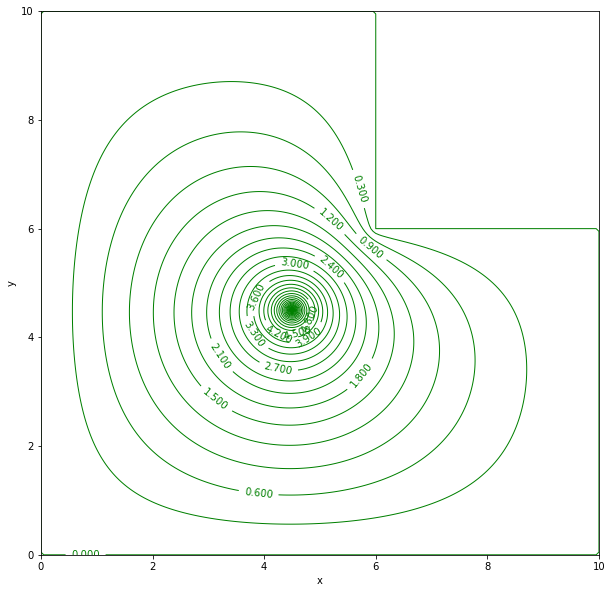

In [6]:
#how many countours you want
N_c = 50

#minimum potential
c_start = 0

#maximum potential
c_end = 15

#change in each potential step
dc = (c_end - c_start) / N_c

#create a countour set and define it from c_start to c_end
c_level = np.zeros(N_c + 1)
for c in range(0, N_c + 1):
    c_level[c] = c_start + c * dc

#plot it!
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.contour(X, Y, phi_total, levels=c_level, colors='g', linewidths=1).clabel()
ax.set_xlabel('x')
ax.set_ylabel('y')

#plot on next page
plt.show()